In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

In [66]:
train_df = pd.read_csv('Train.csv')

In [67]:
train_df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [68]:
train_df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Target'], dtype='object')

In [69]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df['A']= label_encoder.fit_transform(train_df['A'])
  
train_df['A'].unique()

array([0, 2, 1])

In [70]:
X = train_df.drop(['Target'], axis=1)
y = train_df['Target']

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

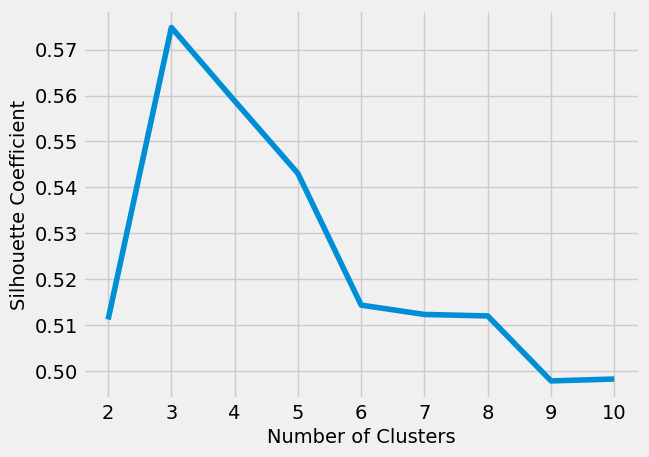

In [72]:
silhouette_coefficients = []

kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [73]:
# Step 3: Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
    

C:\Users\ASHISH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [74]:
# Step 4: Generate cluster labels
cluster_labels = kmeans.labels_

In [75]:
# Add cluster labels to the dataframe
train_df['cluster_label'] = cluster_labels
train_df

,A,B,C,D,E,F,G,H,Target,cluster_label
0,0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9,2
1,0,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12,2
2,2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10,0
3,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
4,2,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6,2
...,...,...,...,...,...,...,...,...,...,...
3127,0,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9,2
3128,0,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12,0
3129,2,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11,2
3130,2,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9,2


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('Target', axis=1), train_df['Target'], test_size=0.1, random_state=42)

In [120]:
# Step 6: Train the SVR model
svr = SVR(kernel='rbf', C=10)
svr.fit(X_train, y_train)

SVR(C=10)

In [121]:
y_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(mse)

4.1151834107088145


In [122]:
test_data = pd.read_csv('Test.csv')

In [123]:
test_data.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [124]:
test_data['A']= label_encoder.fit_transform(test_data['A'])

In [125]:
Index=test_data['Index']
test_data.drop(['Index'],axis=1,inplace=True)

In [126]:
X_scaled2 = scaler.fit_transform(test_data)

In [127]:
k = 3  # Number of clusters
kmeans1 = KMeans(n_clusters=k, random_state=42)
kmeans1.fit(X_scaled2)

C:\Users\ASHISH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASHISH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [128]:
cluster_labels1 = kmeans1.labels_

In [129]:
test_data['cluster_label'] = cluster_labels1


In [130]:
result = svr.predict(test_data)


In [131]:
result1 = pd.DataFrame(Index, columns = ['Index'])
result1['Target']= result

In [132]:
result1

,Index,Target
0,866,11.130233
1,1483,9.759524
2,599,12.653807
3,1702,11.078705
4,670,10.149793
...,...,...
1040,532,9.574586
1041,3417,9.379490
1042,1505,10.938278
1043,2245,9.990154


In [133]:
result1.to_csv("submission13.csv", index=False)